In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA

task1

In [ ]:
creditcard_df = pd.read_csv('creditcard.csv')
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard_df.shape

(284807, 31)

In [ ]:
print(creditcard_df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
creditcard_df.duplicated().sum()

0

In [ ]:
creditcard_df.drop_duplicates(inplace=True)
creditcard_df.shape

(283726, 31)

task 2

In [ ]:
X = creditcard_df.drop(columns="Class", axis=1)
y = creditcard_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

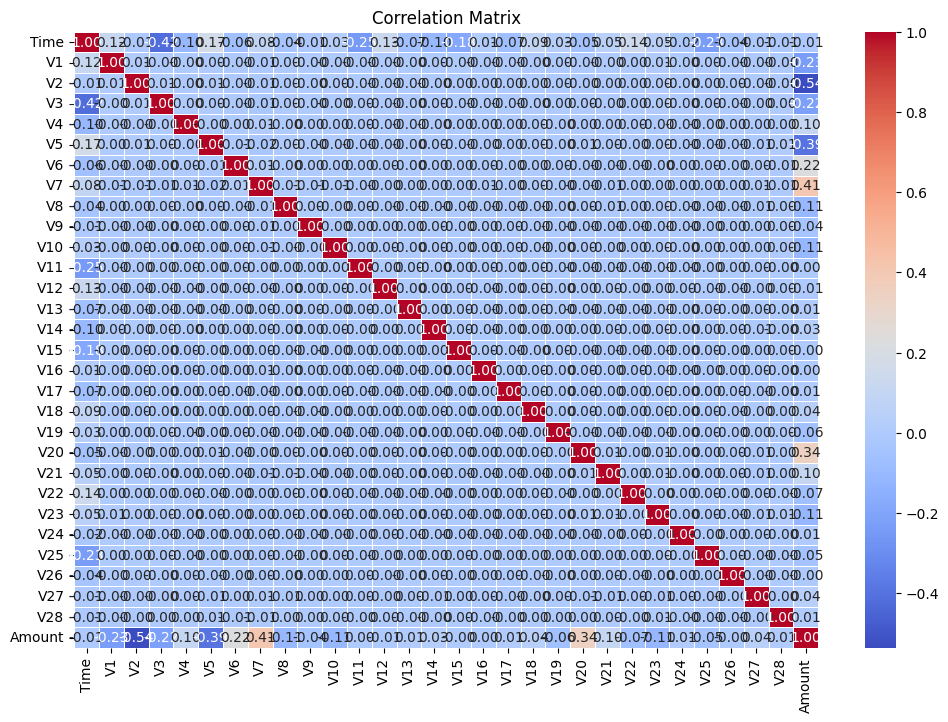

In [ ]:
correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

correlation_threshold = 0.9
to_drop = [column for column in correlation_matrix.columns if any(abs(correlation_matrix[column]) > correlation_threshold)]
X_train_reduced = X_train.drop(columns=to_drop)
X_test_reduced = X_test.drop(columns=to_drop)

In [ ]:
iso_forest = IsolationForest(contamination=0.1, random_state=42)

iso_forest.fit(X_scaled)

y_pred_iso_forest = iso_forest.predict(X_test_scaled)

y_pred_iso_forest = np.where(y_pred_iso_forest == 1, 0, 1)

In [ ]:
oc_svm = OneClassSVM(nu=0.1, kernel="rbf", gamma="scale")

oc_svm.fit(X_scaled)

y_pred_oc_svm = oc_svm.predict(X_test_scaled)

y_pred_oc_svm = np.where(y_pred_oc_svm == 1, 0, 1)

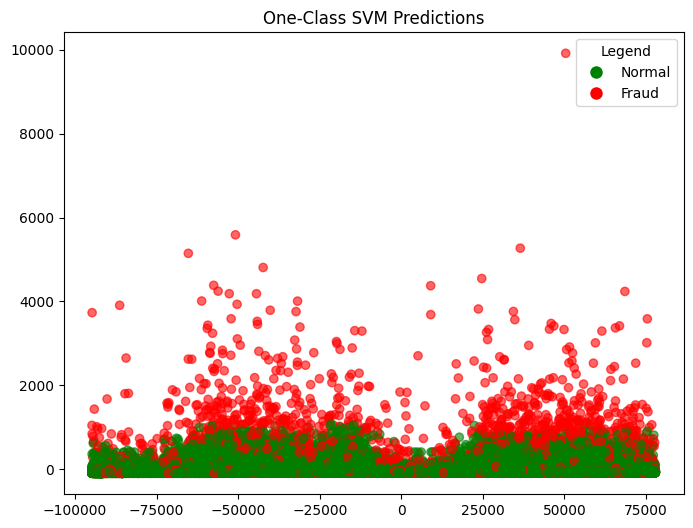

In [67]:
preds = y_pred_oc_svm

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_test)

colors = ['green' if label == 0 else 'red' for label in preds]

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, alpha=0.6)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Normal'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraud')]
plt.legend(handles=handles, title="Legend")

plt.title(f"One-Class SVM Predictions")
plt.show()

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

y_pred_lof = lof.fit_predict(X_test_scaled)

y_pred_lof = np.where(y_pred_lof == 1, 0, 1)

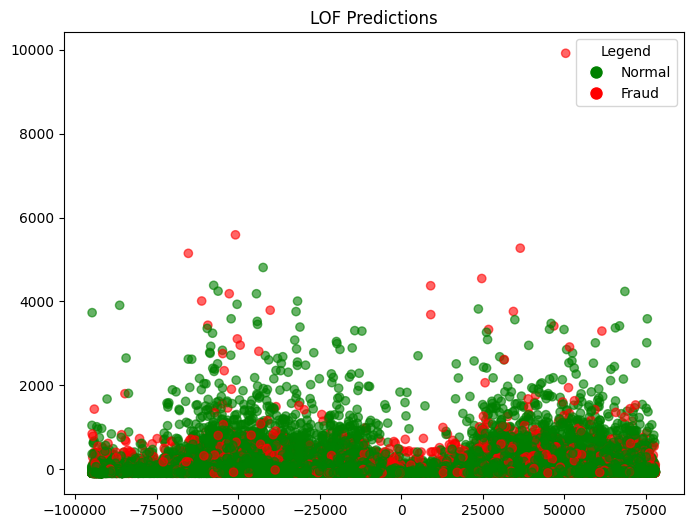

In [65]:
preds = y_pred_lof

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_test)

colors = ['green' if label == 0 else 'red' for label in preds]

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, alpha=0.6)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Normal'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraud')]
plt.legend(handles=handles, title="Legend")

#
plt.title(f"LOF Predictions")
plt.show()

Epoch 1/50, Loss: 1.0061246156692505
Epoch 2/50, Loss: 1.0038162469863892
Epoch 3/50, Loss: 1.0016371011734009
Epoch 4/50, Loss: 0.9994749426841736
Epoch 5/50, Loss: 0.9972600340843201
Epoch 6/50, Loss: 0.9949198365211487
Epoch 7/50, Loss: 0.9923741221427917
Epoch 8/50, Loss: 0.9895301461219788
Epoch 9/50, Loss: 0.9863076210021973
Epoch 10/50, Loss: 0.9826547503471375
Epoch 11/50, Loss: 0.9785393476486206
Epoch 12/50, Loss: 0.9739445447921753
Epoch 13/50, Loss: 0.9688811302185059
Epoch 14/50, Loss: 0.9633492231369019
Epoch 15/50, Loss: 0.957309365272522
Epoch 16/50, Loss: 0.9506852030754089
Epoch 17/50, Loss: 0.943395733833313
Epoch 18/50, Loss: 0.9353892803192139
Epoch 19/50, Loss: 0.9266965985298157
Epoch 20/50, Loss: 0.9174315333366394
Epoch 21/50, Loss: 0.9077844023704529
Epoch 22/50, Loss: 0.8978720903396606
Epoch 23/50, Loss: 0.8877246379852295
Epoch 24/50, Loss: 0.877331018447876
Epoch 25/50, Loss: 0.8666520118713379
Epoch 26/50, Loss: 0.8556331992149353
Epoch 27/50, Loss: 0.844

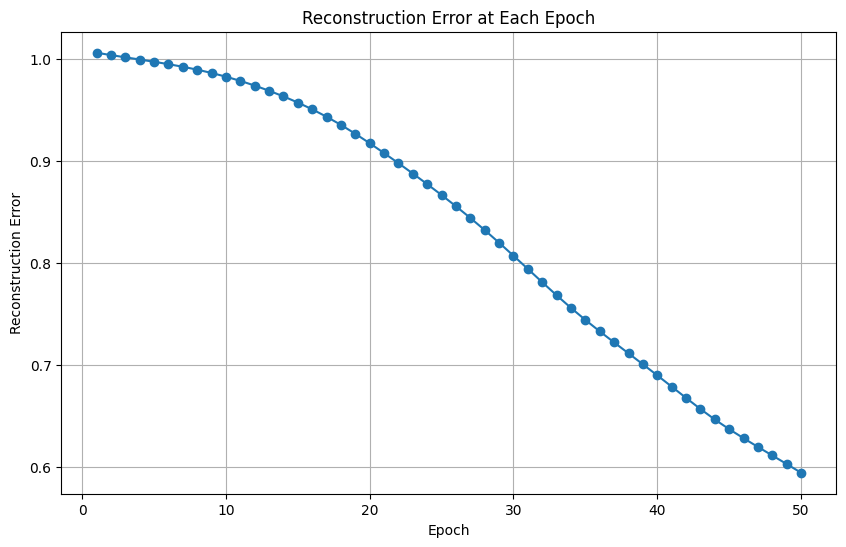

In [72]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

X_train_tensor = torch.Tensor(X_scaled)
X_test_tensor = torch.Tensor(X_test_scaled)

autoencoder = Autoencoder(input_dim=X_scaled.shape[1])

criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

losses = []

epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()

    output = autoencoder(X_train_tensor)

    loss = criterion(output, X_train_tensor)
    losses.append(loss.item())

    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

with torch.no_grad():
    reconstructed = autoencoder(X_test_tensor)
    reconstruction_error = torch.mean((reconstructed - X_test_tensor) ** 2, dim=1)

threshold = reconstruction_error.mean() + 3 * reconstruction_error.std()

y_pred_autoencoder = (reconstruction_error > threshold).int()

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error at Each Epoch")
plt.grid(True)
plt.show()

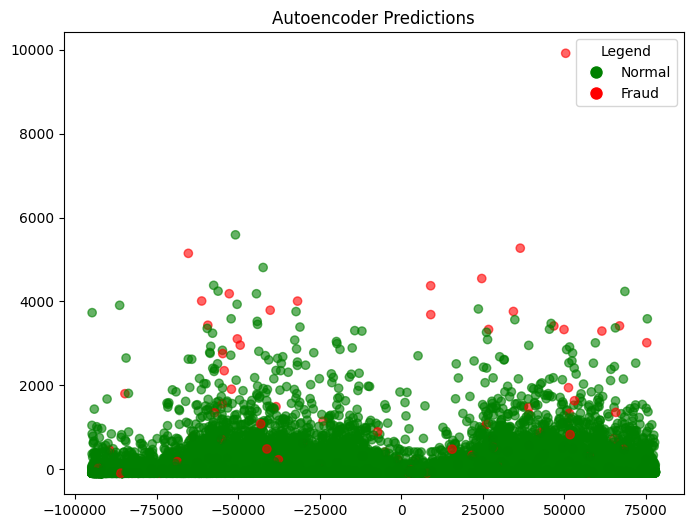

In [66]:
preds = y_pred_autoencoder

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_test)

colors = ['green' if label == 0 else 'red' for label in preds]

plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, alpha=0.6)

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Normal'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Fraud')]
plt.legend(handles=handles, title="Legend")

plt.title(f"Autoencoder Predictions")
plt.show()

In [33]:
print("Isolation Forest:")
print(classification_report(y_test, y_pred_iso_forest))

print("One-Class SVM:")
print(classification_report(y_test, y_pred_oc_svm))

print("LOF:")
print(classification_report(y_test, y_pred_lof))

print("Autoencoder:")
print(classification_report(y_test, y_pred_autoencoder))



Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.90      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.90      0.49     56962
weighted avg       1.00      0.90      0.95     56962

One-Class SVM:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.92      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.91      0.49     56962
weighted avg       1.00      0.90      0.95     56962

LOF:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.00      0.23      0.01        98

    accuracy                           0.90     56962
   macro avg       0.50      0.57      0.48     56962
weighted avg       1.00      0.90   

In [41]:
models = {
    "Isolation Forest": y_pred_iso_forest,
    "One-Class SVM": y_pred_oc_svm,
    "LOF": y_pred_lof,
    "Autoencoder": y_pred_autoencoder
}


for model_name, y_pred in models.items():
    print(f"Results for {model_name}:")
    print(f"Confusion Matrix for {model_name}:\n", confusion_matrix(y_test, y_pred))



Number of anomalies detected by Autoencoder: 319

Results for Isolation Forest:
Confusion Matrix for Isolation Forest:
 [[51234  5630]
 [   10    88]]
Results for One-Class SVM:
Confusion Matrix for One-Class SVM:
 [[51263  5601]
 [    8    90]]
Results for LOF:
Confusion Matrix for LOF:
 [[51190  5674]
 [   75    23]]
Results for Autoencoder:
Confusion Matrix for Autoencoder:
 [[56575   289]
 [   68    30]]


In [42]:
for model_name, y_pred in models.items():
    if isinstance(y_pred, torch.Tensor):
        print(f"Number of anomalies detected by {model_name}: {y_pred.eq(1).sum().item()}\n")  # Use .eq(1) for comparison
    else:
        print(f"Number of anomalies detected by {model_name}: {np.sum(y_pred == 1)}\n")

Number of anomalies detected by Isolation Forest: 5718

Number of anomalies detected by One-Class SVM: 5691

Number of anomalies detected by LOF: 5697

Number of anomalies detected by Autoencoder: 319



Autoencoder показує найкращу загальну точність (99%), але має низьку точність і чутливість для аномалій (як і інші методи). Однак він працює значно краще, ніж інші методи щодо нормальних зразків.
Isolation Forest та One-Class SVM мають схожі результати, з хорошим recall для аномалій, але дуже низькою точністю.
LOF не показує хороших результатів для виявлення аномалій